In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Step 1: Load Data
data = pd.read_csv('Data\cyberbullying_tweets.csv')
data

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\user\AppData\Local\Temp\ipykernel_8864\2196932463.py:2: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('Data\cyberbullying_tweets.csv')


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


<Axes: >

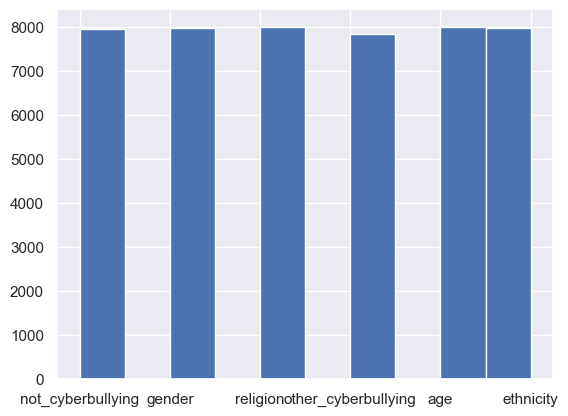

In [11]:
data["cyberbullying_type"].hist()

Data is well balanced

In [6]:
# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

data['tweet_text'] = data['tweet_text'].apply(preprocess_text)

In [8]:
data.head()

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,xochitlsuckkks classy whore red velvet cupcake,not_cyberbullying
3,meh p thanks head concerned another angry dude...,not_cyberbullying
4,rudhoeenglish isi account pretending kurdish a...,not_cyberbullying


In [14]:
X = data["tweet_text"]
y = data["cyberbullying_type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [19]:
# Step 2: Preprocessing and TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
# Step 4: Train Model
svc = SVC()
svc.fit(X_train_tfidf, y_train)

SVC()

In [22]:
forests = RandomForestClassifier()
forests.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [24]:
# Step 5: Evaluate Model
svc_y_pred = svc.predict(X_test_tfidf)
print(classification_report(y_test, svc_y_pred))
print(confusion_matrix(y_test, svc_y_pred))

                     precision    recall  f1-score   support

                age       0.95      0.97      0.96      1998
          ethnicity       0.97      0.98      0.97      1990
             gender       0.91      0.84      0.87      1993
  not_cyberbullying       0.61      0.52      0.56      1986
other_cyberbullying       0.59      0.71      0.64      1956
           religion       0.96      0.95      0.95      2000

           accuracy                           0.83     11923
          macro avg       0.83      0.83      0.83     11923
       weighted avg       0.83      0.83      0.83     11923

[[1932    4    4   25   32    1]
 [   2 1948    4    5   26    5]
 [   5   10 1671  129  174    4]
 [  80   22   66 1040  717   61]
 [  19   20   85  437 1388    7]
 [   1    4    4   66   31 1894]]


In [25]:
# Step 5: Evaluate Model
rf_y_pred = forests.predict(X_test_tfidf)
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

                     precision    recall  f1-score   support

                age       0.98      0.97      0.97      1998
          ethnicity       0.98      0.98      0.98      1990
             gender       0.90      0.84      0.87      1993
  not_cyberbullying       0.60      0.52      0.55      1986
other_cyberbullying       0.57      0.68      0.62      1956
           religion       0.96      0.96      0.96      2000

           accuracy                           0.83     11923
          macro avg       0.83      0.83      0.83     11923
       weighted avg       0.83      0.83      0.83     11923

[[1939    1    4   27   24    3]
 [   2 1954    6    2   23    3]
 [   2    5 1676  134  174    2]
 [  31   21   72 1028  764   70]
 [   8    8   95  504 1337    4]
 [   0    1   11   28   31 1929]]


In [26]:
# Step 6: Save Model and Vectorizer
joblib.dump(svc, 'svc_model.pkl')
joblib.dump(forests, "random_forests.pkl")
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']